# Load dataset

In [1]:
import pandas as pd
import os 

from data_preprocessing import *

2023-03-09 01:01:54.930029: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
work_dir = ''
data_dir = work_dir + 'data/experiment2/'

X_df = pd.read_csv(f'{data_dir}HA_X.csv')
y_df = pd.read_csv(f'{data_dir}HA_y.csv')['binding']

X_df, y_df = subsample_rbd(X_df, y_df)

seq = ['CDRH1_AA', 'CDRH2_AA', 'CDRH3_AA', 'CDRL1_AA', 'CDRL2_AA', 'CDRL3_AA']
cdr_char = 'XEDRKHQNSTPGCAVILMFYW-'
test_size = 0.1

pad_len = []
for c in X_df[seq]:
    pad_len.append(X_df[c].str.len().max())

codes_dict = {i: c for i, c in enumerate(cdr_char)}

[train_set, val_set, test_set], [X_train_id, X_eval_id, X_test_id] = encode(X_df, y_df, cdr_char, test_size, pad_len, le=False, col_names={'id':'Name','sequence':seq})


In [4]:
(train_x, y_train), (val_x, y_val), (test_x, y_test) = [train_set, val_set, test_set]
input_length = train_x.shape[1]

# Train

In [5]:
from tensorflow.keras import backend as K
from model_training import *


### random forest

In [6]:

K.clear_session()
CDR_model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)
CDR_model, CDR_history = train_tree(CDR_model, (train_x, y_train), (val_x, y_val))


2023-03-09 01:02:22.361269: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-03-09 01:02:22.453262: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:31:00.0 name: NVIDIA RTX A5000 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 64 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 715.34GiB/s
2023-03-09 01:02:22.453899: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4b:00.0 name: NVIDIA RTX A5000 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 64 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 715.34GiB/s
2023-03-09 01:02:22.454417: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 with properties: 
pciBusID: 0000:b1:00.0 name: NVIDIA RTX A5000 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 64 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 715.34GiB/s
2023-03-09

[INFO decision_forest.cc:590] Model loaded with 300 root(s), 102472 node(s), and 78 input feature(s).
[INFO abstract_model.cc:876] Engine "RandomForestOptPred" built
[INFO kernel.cc:797] Use fast generic engine


In [9]:
eval_df, pred, (label, pred_bool) = test_model(CDR_model, (test_x, y_test, X_test_id))
display(eval_df)

True     239
False     45
dtype: int64

,Id,Label,Prediction,Probability
278,C661,False,True,0.583333
173,C2240,False,True,0.510000
183,COV2-2894,False,True,0.733333
126,MnC4t1p1_A10,False,True,0.610000
114,C710,False,True,0.699999
110,CQTS067,False,True,0.590000
96,ADI-56007,False,True,0.530000
94,Fab2-7,False,True,0.513333
220,ADI-55771,False,True,0.593333
209,CQTS003,False,True,0.663333


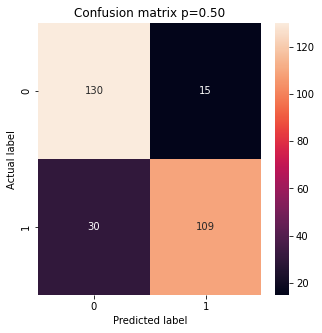

In [10]:
plot_cm(label, pred_bool)